In [0]:
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
from scipy.stats import zscore


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Unsupervised Learning Mahesh Anand/iris.csv",header=None,names=['SL','SW','PL','PW','class'])

In [0]:
X=df.drop('class',axis=1)

In [62]:
X.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


In [0]:
#X_std = X.apply(zscore)

In [0]:
sc=StandardScaler()
X_std = sc.fit_transform(X)

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [32]:
kmeans.inertia_

140.96581663074699

In [0]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X) )
centroid_df

,SL,SW,PL,PW
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


In [8]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [0]:
cov_matrix.shape

(4, 4)

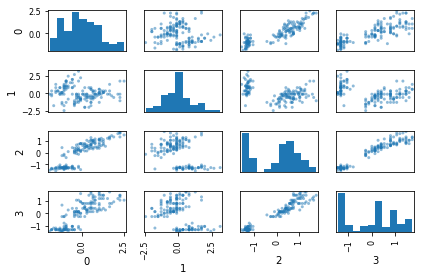

In [0]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [11]:
print('Eigen Values \n%s', eigenvalues)
print('\n Eigen Vectors \n%s', eigenvectors)

Eigen Values 
%s [2.93035378 0.92740362 0.14834223 0.02074601]

 Eigen Vectors 
%s [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [0]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


In [18]:
eig_pairs

[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559593,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [0]:
eig_pairs.sort()
eig_pairs.reverse()

In [20]:
eig_pairs

[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559593,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [21]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.930353775589317, 0.9274036215173419, 0.14834222648163944, 0.02074601399559593]


In [24]:
eigvectors_sort[0:2]

[array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]),
 array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])]

In [13]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.77045209  95.80097536  99.48480732 100.        ]


In [15]:
0.9274036215173419/sum(eigenvalues)

0.2303052326768065

In [0]:
P_reduce = np.array(eigvectors_sort[0:3]).transpose()


In [52]:
Proj_data_2D = np.dot(X_std,P_reduce)
type(Proj_data_2D)

numpy.ndarray

In [49]:
kmeans_pca = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans_pca.fit(Proj_data_2D)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [50]:
kmeans_pca.inertia_

137.97308684244518

In [51]:
L=pd.DataFrame(kmeans.labels_)
L[0].value_counts()

2    53
1    50
0    47
Name: 0, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering in PC Dimension')

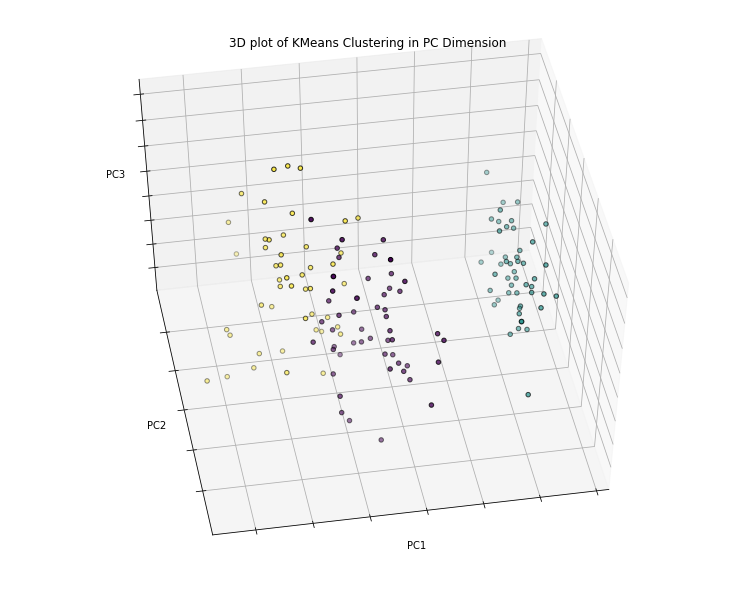

In [59]:
from mpl_toolkits.mplot3d import Axes3D
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=80)
#kmeans.fit(df_scaled)
L = kmeans_pca.labels_
ax.scatter(Proj_data_2D[:, 0], Proj_data_2D[:, 1], Proj_data_2D[:, 2],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D plot of KMeans Clustering in PC Dimension')


In [60]:
centroids=kmeans_pca.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = ['pc1','pc2','pc3'] )
centroid_df

,pc1,pc2,pc3
0,0.567138,0.807675,0.050886
1,-2.220193,-0.292225,-0.043955
2,1.722369,-0.599905,-0.010622


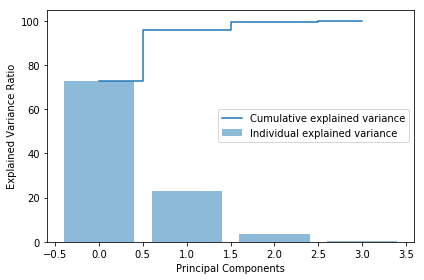

In [0]:
plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:
P_reduce = np.array(eigvectors_sort[0:8]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [0]:
# First three principal components explain 99% of the variance in the data. The first three PCA is shown below
# The three PCA will have to be named because they represent composite of original dimensions

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


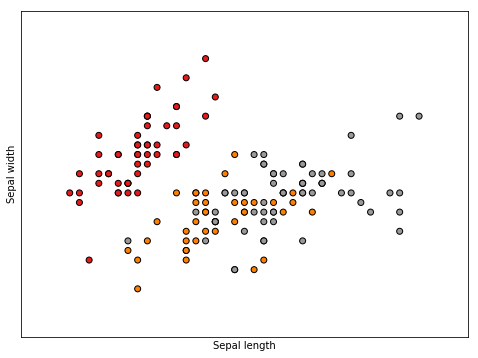

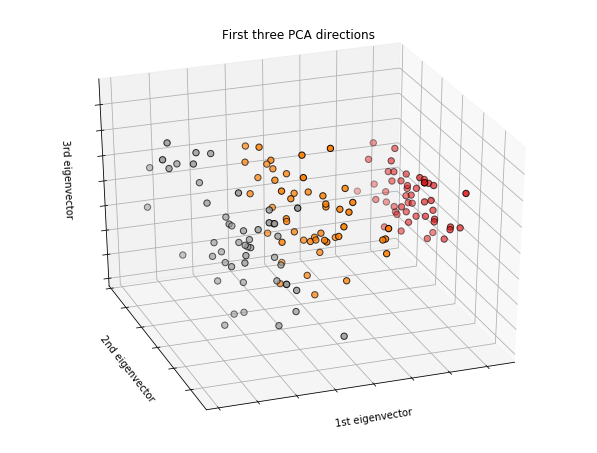

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
# Source - http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html